
#  Performing a chi-square test

##  Assignment 

The **chi-square independence test** compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or **incoterms** for short.

The `late_shipments` dataset includes a `vendor_inco_term` that describes the incoterms that applied to a given shipment. The choices are:

- [`EXW`](https://www.investopedia.com/terms/e/exw.asp): "Ex works". The buyer pays for transportation of the goods.
- [`CIP`](https://www.investopedia.com/terms/c/carriage-and-insurance-paid-cip.asp): "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
- [`DDP`](https://www.investopedia.com/terms/d/delivery-duty-paid.asp): "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
- [`FCA`](https://www.investopedia.com/terms/f/fca.asp): "Free carrier". The seller pays for transportation of the goods.

Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of `0.01`.

\(H_{0}\): `vendor_inco_term` and `freight_cost_group` are independent.

\(H_{A}\): `vendor_inco_term` and `freight_cost_group` are associated.

`late_shipments` is available, and the following have been loaded: `matplotlib.pyplot` as `plt`, `pandas` as `pd`, and `pingouin`.

##  Pre exercise code 

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin
late_shipments = pd.read_feather(
  path = "/usr/local/share/datasets/late_shipments.feather"
)
late_shipments['freight_cost_group'] = np.where(late_shipments['freight_cost_usd'] <= 5000, "reasonable", "expensive")
late_shipments = late_shipments[late_shipments['vendor_inco_term'] != "DDU"]
```



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin
late_shipments = pd.read_feather(
  path = "late_shipments.feather"
)
late_shipments['freight_cost_group'] = np.where(late_shipments['freight_cost_usd'] <= 5000, "reasonable", "expensive")
late_shipments = late_shipments[late_shipments['vendor_inco_term'] != "DDU"]


##  Instructions 

- Calculate the proportion of `freight_cost_group` in `late_shipments` grouped by `vendor_inco_term`.




In [41]:
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)
props

vendor_inco_term  freight_cost_group
CIP               reasonable            0.607143
                  expensive             0.392857
DDP               expensive             0.550000
                  reasonable            0.450000
EXW               expensive             0.587432
                  reasonable            0.412568
FCA               reasonable            0.657658
                  expensive             0.342342
Name: proportion, dtype: float64


- Unstack the `.value_counts()` result to be in wide format instead of long.


In [42]:
props = props.unstack()

In [43]:
props

freight_cost_group,expensive,reasonable
vendor_inco_term,,
CIP,0.392857,0.607143
DDP,0.550000,0.450000
EXW,0.587432,0.412568
FCA,0.342342,0.657658



- Create a proportional stacked bar plot with bars filled based on `freight_cost_group` across the levels of `vendor_inco_term`.


<Axes: xlabel='vendor_inco_term'>

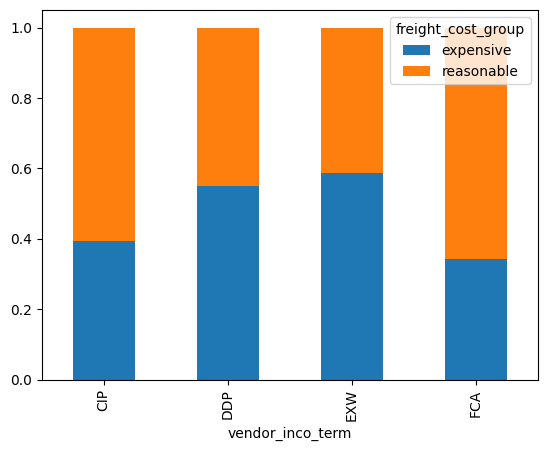

In [47]:
props.plot(kind='bar', stacked=True)

- Perform a chi-square test of independence on `freight_cost_group` and `vendor_inco_term` in the `late_shipments` dataset.



In [49]:
exp, obs, stats = pingouin.chi2_independence(data=late_shipments,
                                             x='freight_cost_group',
                                             y='vendor_inco_term')
stats[stats['test'] == 'pearson']

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,28.940828,3.0,0.000002,0.170205,0.99775


Reject the null hypothesis and conclude that `vendor_inco_term` and `freight_cost_group` are associated.